# PoC Advanced

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
path= 'C:/Users/i/Downloads/'
train = pd.read_csv(path+'train_na_filled.csv')
test = pd.read_csv(path+'test_na_filled.csv')

In [24]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외한 전체 data

In [25]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [26]:
train['gender']

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
45524    Female
45525      Male
45526    Female
45527      Male
45528      Male
Name: gender, Length: 45529, dtype: object

In [36]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01', 'wf_02',
       'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07',
       'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'voted',
       'mach_score', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Emotional Stability', 'Openness to Experiences'],
      dtype='object')

+ Tipi score 계산

In [27]:
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

In [6]:
# TIPI
tp_cols = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']
#train.groupby(tp_cols)['voted'].mean()
train[tp_cols+['mach_score']].corr(method='spearman')

,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,mach_score
Extraversion,1.000000,0.096105,0.086891,0.127325,0.098816,-0.121473
Agreeableness,0.096105,1.000000,0.081367,0.106199,0.016639,-0.053351
Conscientiousness,0.086891,0.081367,1.000000,0.054258,0.069507,-0.055764
Emotional Stability,0.127325,0.106199,0.054258,1.000000,0.043355,-0.082831
Openness to Experiences,0.098816,0.016639,0.069507,0.043355,1.000000,-0.051944
mach_score,-0.121473,-0.053351,-0.055764,-0.082831,-0.051944,1.000000


In [35]:
train.gender.value_counts()

Male      24214
Female    21315
Name: gender, dtype: int64

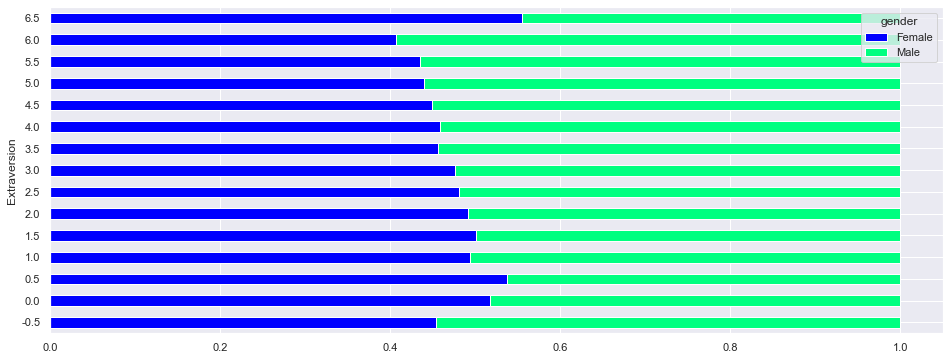

In [69]:
# tp 점수 
extraversion_gender=train.groupby(['Extraversion'])['gender'].value_counts(normalize=True).unstack()
extraversion_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

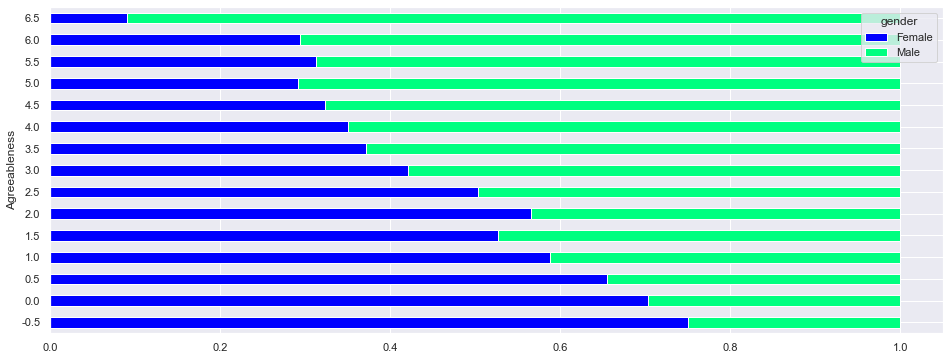

In [29]:
Agreeableness_gender=train.groupby(['Agreeableness'])['gender'].value_counts(normalize=True).unstack()
Agreeableness_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

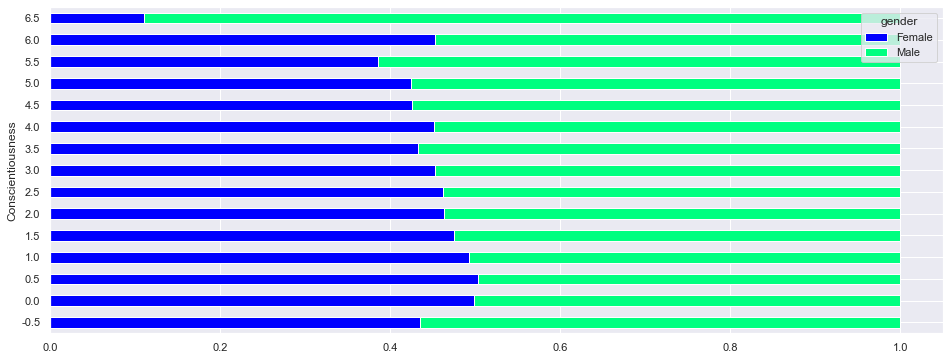

In [30]:
Conscientiousness_gender=train.groupby(['Conscientiousness'])['gender'].value_counts(normalize=True).unstack()
Conscientiousness_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

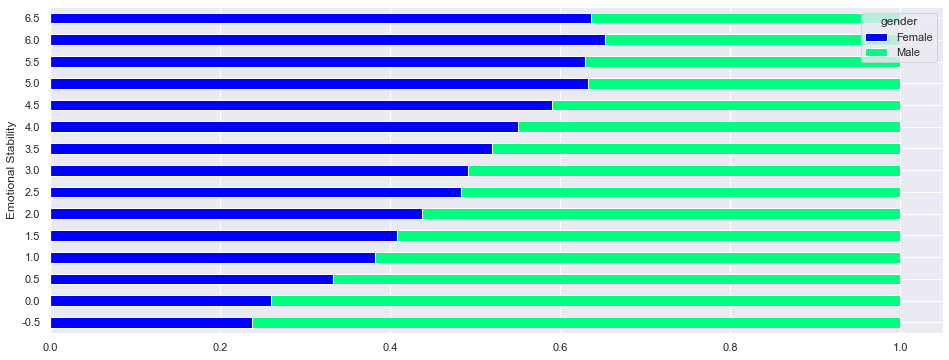

In [31]:
Emotional_gender=train.groupby(['Emotional Stability'])['gender'].value_counts(normalize=True).unstack()
Emotional_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

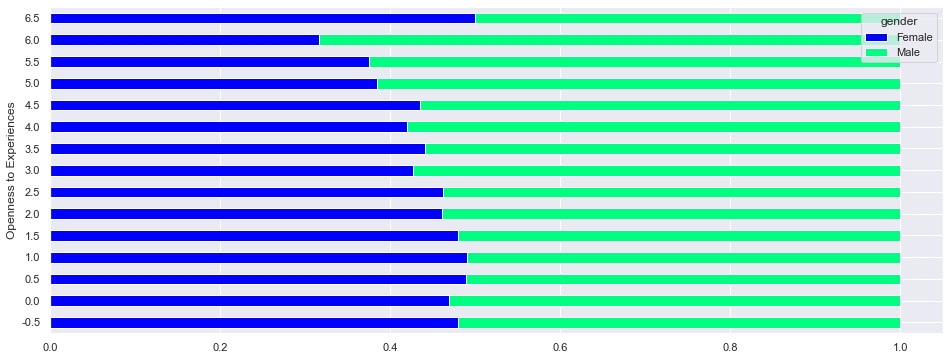

In [32]:
Openness_gender=train.groupby(['Openness to Experiences'])['gender'].value_counts(normalize=True).unstack()
Openness_gender.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [1]:
married_gender=train.groupby(['married'])['gender'].value_counts(normalize=True).unstack()
married_gender.plot(kind='bar', figsize=[10,6], colormap='winter')

NameError: name 'train' is not defined

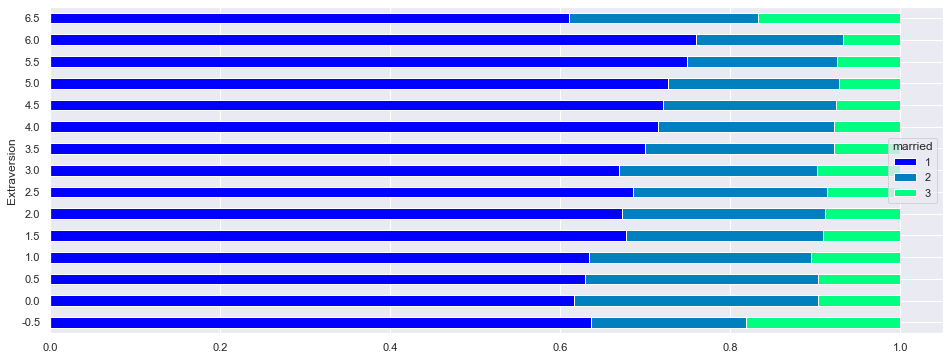

In [39]:
married_Extraversion=train.groupby(['Extraversion'])['married'].value_counts(normalize=True).unstack()
married_Extraversion.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

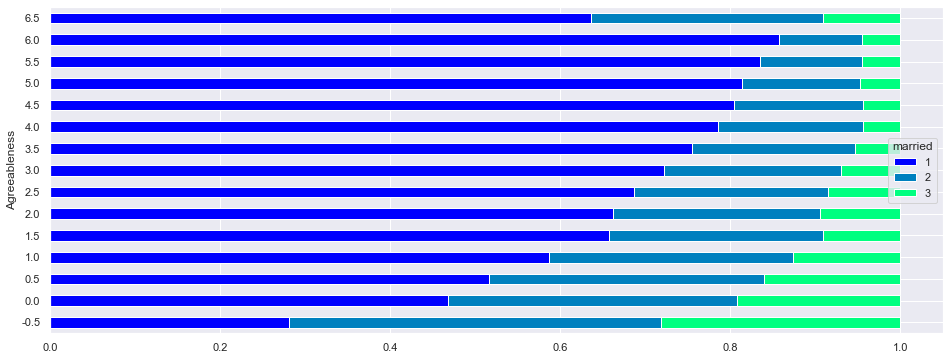

In [63]:
married_Extraversion=train.groupby(['Agreeableness'])['married'].value_counts(normalize=True).unstack()
married_Extraversion.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

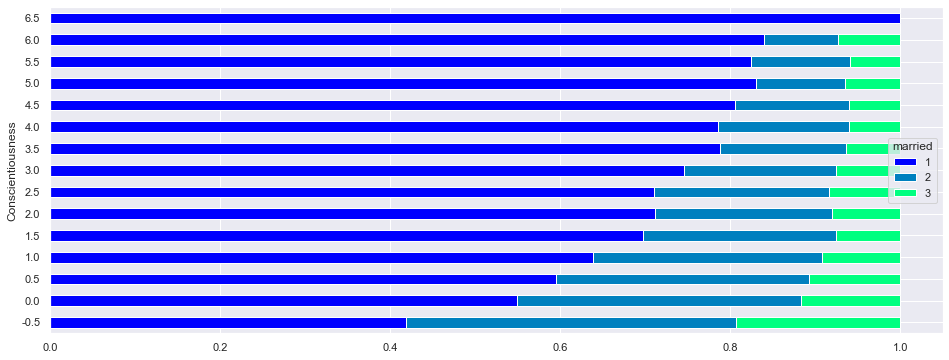

In [64]:
married_Extraversion=train.groupby(['Conscientiousness'])['married'].value_counts(normalize=True).unstack()
married_Extraversion.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

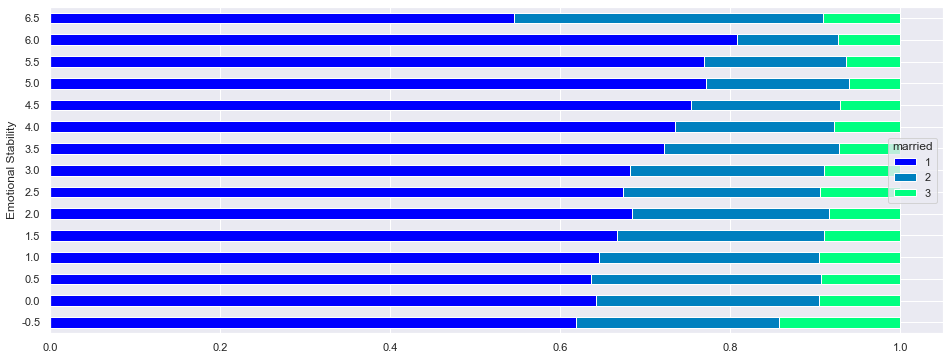

In [65]:
married_Extraversion=train.groupby(['Emotional Stability'])['married'].value_counts(normalize=True).unstack()
married_Extraversion.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

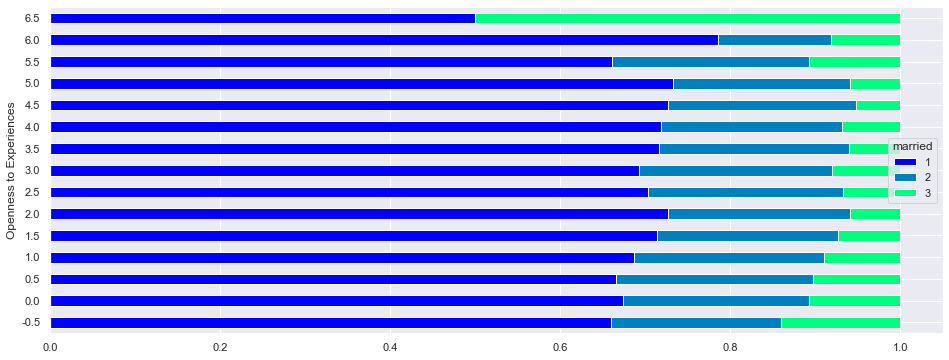

In [66]:
married_Extraversion=train.groupby(['Openness to Experiences'])['married'].value_counts(normalize=True).unstack()
married_Extraversion.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

+ 성별과 성격 분석
 --> 남자들은 내향성, 비우호성, 비성실성, 신경성, 보수성이 높으며 여자들은 외향성, 우호성, 성실성, 비신경성, 진보성이 높다

+ 성별과 결혼 여부 분석
 --> 남자의 경우 Never married의 경향이 크며, 여자의 경우 Previously married의 경향이 크다
 
+ 성격과 결혼 여부 분석
 --> Never married의 경우 내향성, 비우호성, 비성실성, 신경성, 보수성이 높으며 Previously married의 경우 외향성, 우호성, 성실성, 비신경성, 진보성이 높으며